# Module 1.2 - Probability and Statistic for ML

#### Import libraries

In [2]:
# for inline plots in jupyter
%matplotlib inline

# import matplotlib
import matplotlib.pyplot as plt

# for latex equations
from IPython.display import Math, Latex

# for displaying images
from IPython.core.display import Image

In [4]:
# import seaborn
import seaborn as sns

# settings for seaborn plotting style
sns.set(color_codes=True)

# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

## Main Probability Distributions

### Uniform Distribution

One of the most common, simplest and useful distributions. 


$f(x) = \begin{cases}
       \frac{1}{b-a} & \text{for  } a \le x \le b  \\
       0 & \text{for  } x \le a \,\,  \text{   or   }  \,\, x \ge b  \\
     \end{cases}$

In [5]:
# import uniform distribution
from scipy.stats import uniform

In [46]:
# random numbers from uniform distribution
n = 100000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform Distribution ')]

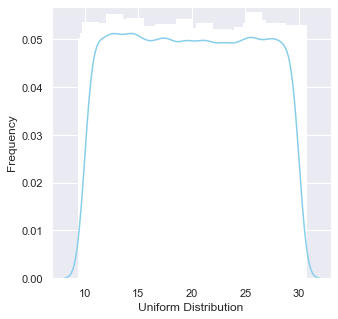

In [47]:
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')


### Poisson Distribution 

$P(k \text{  events in interval}) = e^{-\lambda}\frac{\lambda^k}{k!}$

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process.

-  The average number of events in an interval is designated $\lambda$ (lambda)
-  $\mu$  is the rate at which the events happen

In [48]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=100000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

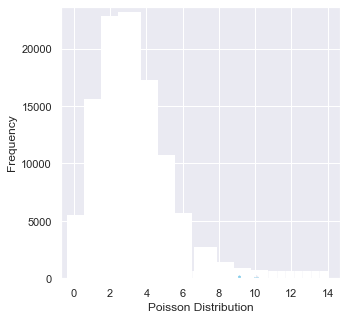

In [49]:
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

### Binomial Distribution

$f(k,n,p) = P(k;n,p) = P(X = k) = \binom{n}{p}p^k(1-p)^{n-k}$

where $\binom{n}{p} = \frac{n!}{k!(n-k)!}$

gain or loss

- $n$ is the total number of trials
- $p$ is the probability of success in each trial

In [19]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

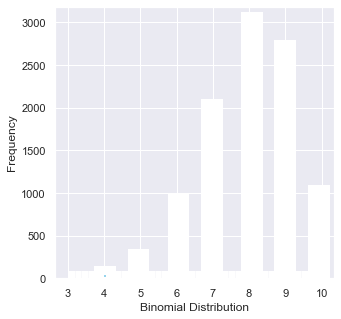

In [20]:
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

### Bernoulli Distribution

$f(k;p) = p^k(1-p)^{1-k}$  

for $k \in \{0,1\}$

The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted $(n=1)$

For example: a coin toss

In [21]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

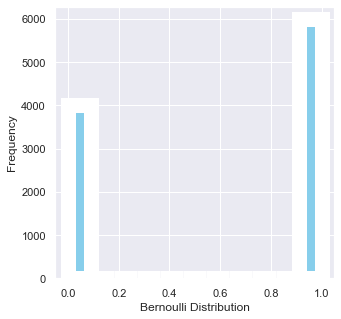

In [22]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

### Gamma Distribution

$f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}$   for $x >0 $ and $\alpha,\beta >0$

The gamma distribution is a two-parameter family of continuous probability distributions. While it is used rarely in its raw form but other popularly used distributions like exponential, chi-squared, erlang distributions are special cases of the gamma distribution

In [12]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Gamma Distribution')]

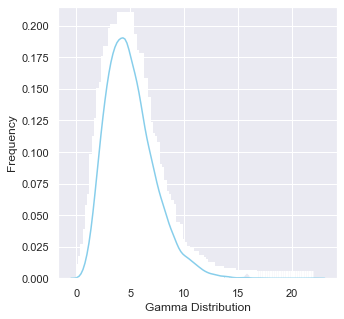

In [13]:
ax = sns.distplot(data_gamma,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Exponential Distribution

$f(x) = \begin{cases}
       \lambda e^{-\lambda x}  & \text{for  }x \ge 0  \\
       0 & \text{for  } x < 0 \\
     \end{cases}$

The exponential distribution describes the time between events in a Poisson point process

In [15]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Exponential Distribution')]

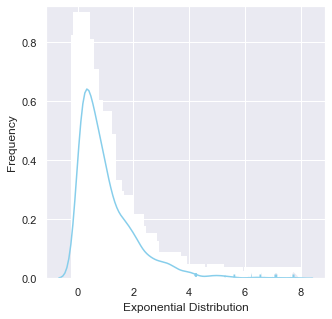

In [16]:
ax = sns.distplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

### Normal Distribution

$f(x, \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

The most known continuos distribution. 

In [10]:
from scipy.stats import norm
# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

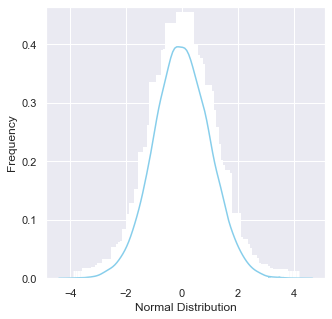

In [11]:
ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Central Limit Theorem

In [30]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

In [50]:
# Step 1
# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 400)

In [32]:
# Step 2
## sample from population with different number of sampling
# a list of sample mean
meansample = []
# number of sample
numofsample = [1000,2500,5000,10000,25000,50000]
# sample size
samplesize = 500
# for each number of sampling (1000 to 50000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)

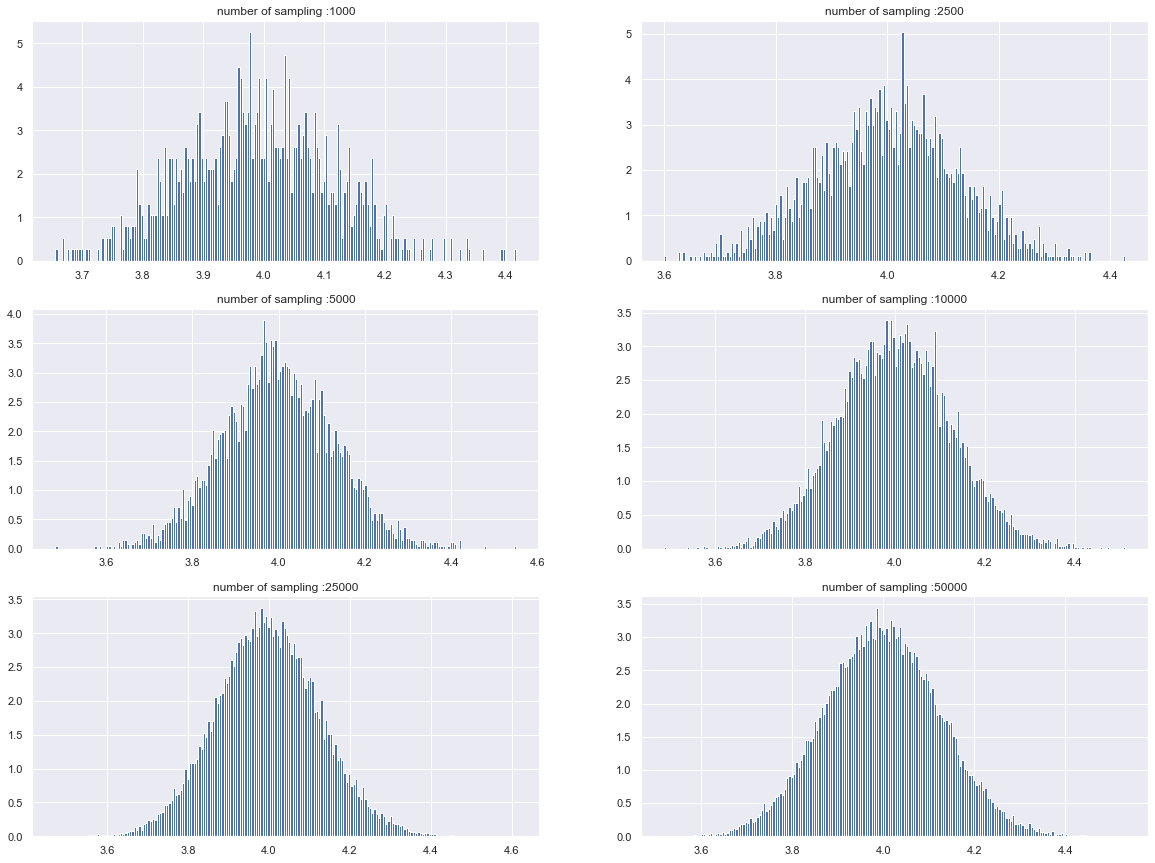

In [33]:
# Step 3
# I will import the list above, so I make the code after this line run only when I call this file directly
if __name__ == "__main__":   
    # plot
    cols = 2
    rows = 3
    fig, ax = plt.subplots(rows, cols, figsize=(20,15))
    n = 0
    for i in range(0, rows):
        for j in range(0, cols):
            ax[i, j].hist(meansample[n], 200, density=True)
            ax[i, j].set_title(label="number of sampling :" + str(numofsample[n]))
            n += 1
    plt.show()

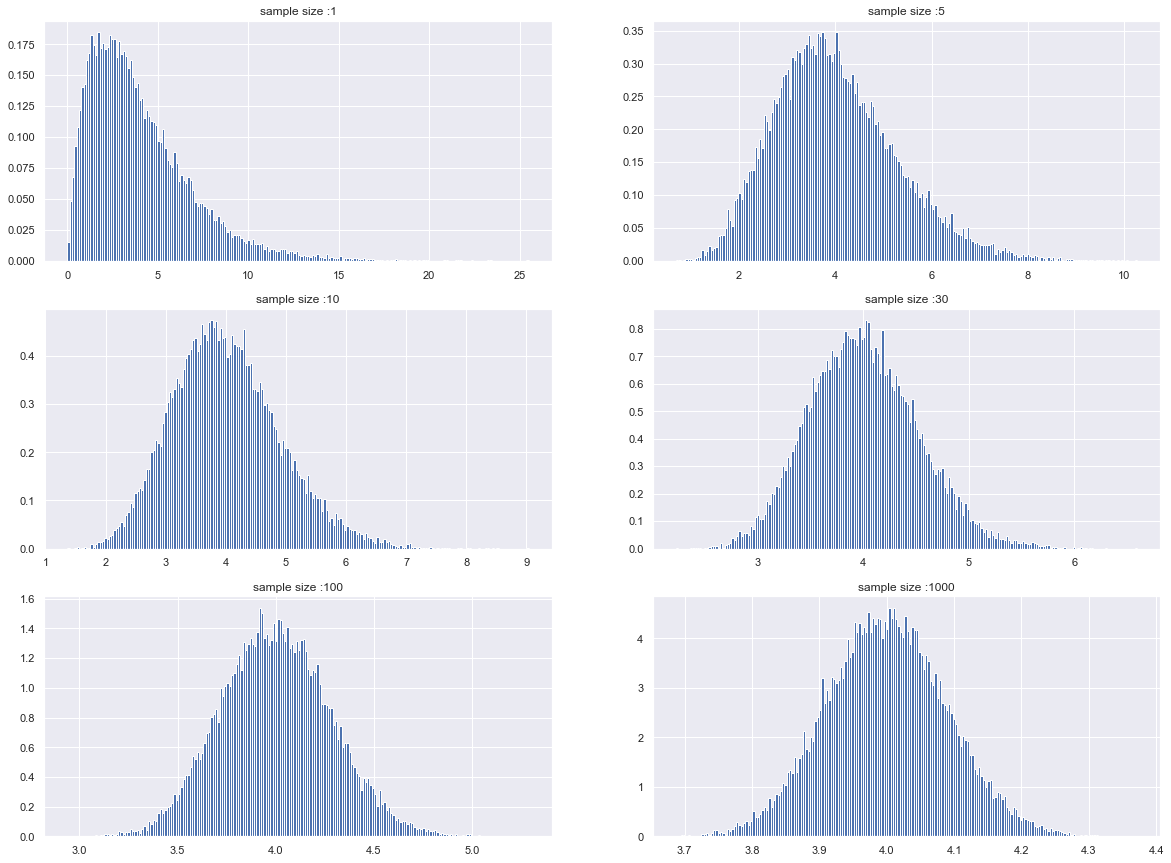

In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt

# build gamma distribution as population
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000000)

# Step 1
## sample with different sample size
# list of sample mean
meansample = []
# number of sampling
numofsample = 25000
# sample size
samplesize = [1,5,10,30,100,1000]
# for each sample size (1 to 1000)
for i in samplesize:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,numofsample):
        # sampling i sample from population
        rc = random.choices(s, k=i)
        # collect mean of each sample
        eachmeansample.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)

# Step 2
# plot
cols = 2
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], 200, density=True)
        ax[i, j].set_title(label="sample size :" + str(samplesize[n]))
        n += 1
plt.show()